# Taraneh Andalib, April 2018 

#### In this notebook I will look into the world happiness data from kaggle. You can download the data from the following link: https://www.kaggle.com/unsdsn/world-happiness/version/2.

#### The first thing to do is to import the libraries that we are going to use for this analysis.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#### Now I load the data file from 2015 and take a look at the content

In [10]:
data2015 = pd.read_csv('./2015.csv')

In [11]:
data2015.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [12]:
print data2015['Country'].count

<bound method Series.count of 0                   Switzerland
1                       Iceland
2                       Denmark
3                        Norway
4                        Canada
5                       Finland
6                   Netherlands
7                        Sweden
8                   New Zealand
9                     Australia
10                       Israel
11                   Costa Rica
12                      Austria
13                       Mexico
14                United States
15                       Brazil
16                   Luxembourg
17                      Ireland
18                      Belgium
19         United Arab Emirates
20               United Kingdom
21                         Oman
22                    Venezuela
23                    Singapore
24                       Panama
25                      Germany
26                        Chile
27                        Qatar
28                       France
29                    Argentina
          

The table above has 12 columns and 158 rows. This includes the country name, the regoin where the country is located, its Happiness Rank, Happiness score, Standard error, Economy GDP per capita), Family (size), Health (life expectancy), Freedom, Trust (Government Corruption), Generosity and Dystopia residual.

We should always first check to see if there is any null value in the table so that we can handle it. You cannot analyze the data unless you explore it and find out if there are missing values. You should never assume that the data is perfect.

In [15]:
data2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

So here we are so lucky and the data is clean. It is good for people who are starting to do projects. However you should always keep in mind that data cleaning and data wrangling is a big portion of data scientist's job. Even as a Physicist I can emphesize on the value of data cleaning. To cook a good dinner you have to use good ingredient! It is the same story here. You have to prepare the data for furthur analysis.


(-0.5, 1.5)

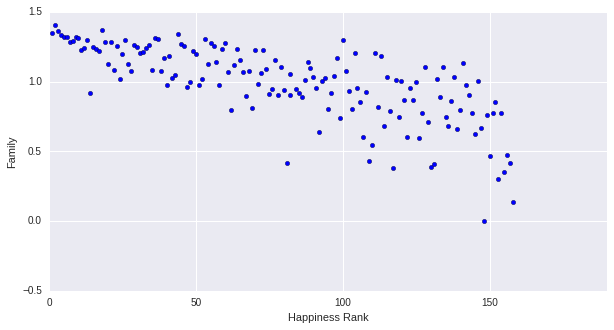

In [47]:
ax, fig = plt.subplots(1,1, figsize=(10,5))
plt.scatter(x= data2015['Happiness Rank'], y=data2015['Family'])
plt.xlabel('Happiness Rank')
plt.ylabel('Family')
plt.xlim(0,190)
plt.ylim(-0.5, 1.5)

The graph above shows that as the family size increases the happiness rank increases. These variables as I expected have correlation.

I also guess that when the economy is good, people will be happy and that is because government will have more resources to address the needs of individuals. Let's take a look at that.

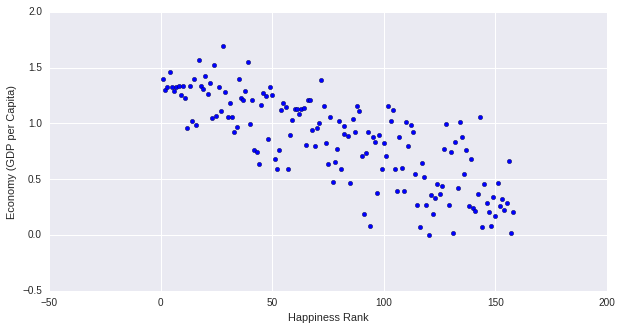

In [46]:
ax, fig = plt.subplots(1,1, figsize=(10,5))
plt.scatter(x= data2015['Happiness Rank'], y=data2015['Economy (GDP per Capita)'])
plt.ylabel('Economy (GDP per Capita)')
plt.xlabel('Happiness Rank')

As we can see Happiness is highly related to the Economy. The Happiness rank decreases linearly as the economy decreases.

The next feature that I want to look at is the health or the life expectancy. I expect to see that the happier the country, the longer they expect to live but I am yet not sure if this relation would be linear or exponential.

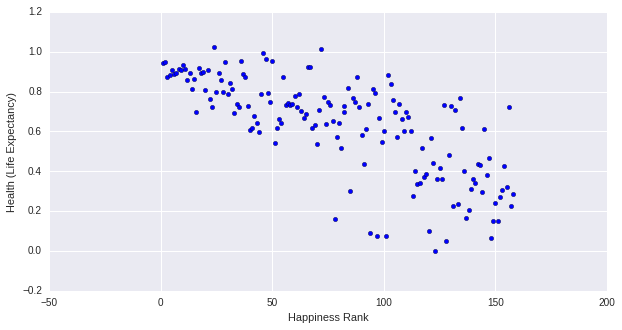

In [48]:
ax, fig = plt.subplots(1,1, figsize=(10,5))
plt.scatter(x= data2015['Happiness Rank'], y=data2015['Health (Life Expectancy)'])
plt.ylabel('Health (Life Expectancy)')
plt.xlabel('Happiness Rank')

I need to know what the number in the health column mean. To figure this out, I will take a look at the max and min values.

In [51]:
print ('Maximum value for health',data2015['Health (Life Expectancy)'].max())
print ('Minimum value for health',data2015['Health (Life Expectancy)'].min())
print ('Mean value for health',data2015['Health (Life Expectancy)'].mean())


('Maximum value for health', 1.02525)
('Minimum value for health', 0.0)
('Mean value for health', 0.63025936708860764)


My hypothesis was that this value is between 0 and one and 1 is absolute health but I am obviously wrong. Since it also says life expectancy in the paranthesis it has something to do with how long they live.

Anyways, the figure shows that when the health value is lower, they are less happy and it makes sense.

Now I will check out the generosity min, max and mean values. I have no idea how they measured it (I guess I can look up!) but for now I will just look at theses values.

In [53]:
print ('Maximum value for generosity',data2015['Generosity'].max())
print ('Minimum value for generosity',data2015['Generosity'].min())
print ('Mean value for generosity',data2015['Generosity'].mean())

('Maximum value for generosity', 0.79588000000000003)
('Minimum value for generosity', 0.0)
('Mean value for generosity', 0.23729550632911389)


Let's see how generosity and Happiness Rank are correlated:

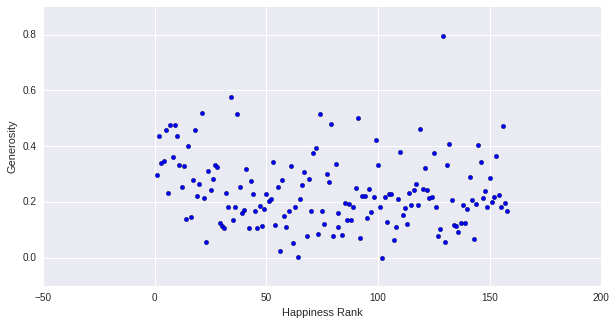

In [54]:
ax, fig = plt.subplots(1,1, figsize=(10,5))
plt.scatter(x= data2015['Happiness Rank'], y=data2015['Generosity'])
plt.ylabel('Generosity')
plt.xlabel('Happiness Rank')

from the figure above, it is really difficult to see any real correlation between happiness rank and generosity. It might be correlated with other features and I will look at it later on.

For Freedom, I have the hypothesis that happier countries have more freedom. Let's see if this is true!

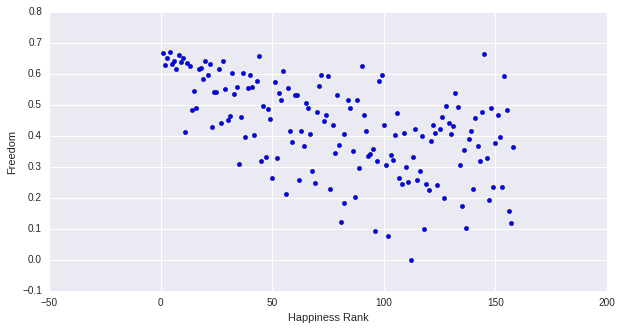

In [55]:
ax, fig = plt.subplots(1,1, figsize=(10,5))
plt.scatter(x= data2015['Happiness Rank'], y=data2015['Freedom'])
plt.ylabel('Freedom')
plt.xlabel('Happiness Rank')

It is a little bit more scattered than I expected. Let's take a look at min, max and mean values. Sometimes it is better to put scattered values in bins. It might be correlated to other features in the table. I will come back to this.

I expect that happier countries have higher trust in their government. Let's check this hypothesis below.

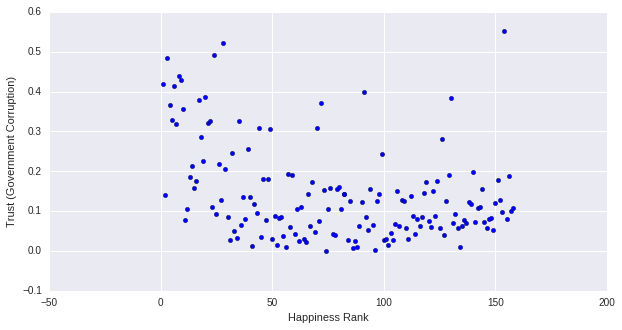

In [56]:
ax, fig = plt.subplots(1,1, figsize=(10,5))
plt.scatter(x= data2015['Happiness Rank'], y=data2015['Trust (Government Corruption)'])
plt.ylabel('Trust (Government Corruption)')
plt.xlabel('Happiness Rank')

The plot above is very interesting! it shows that in general my hypothesis was right to some extend. However it plateus when the countries rank is about 50 since the trust value goes down to zero. It means that 